In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
data

X = data['data']
Y = data['target']

df = pd.DataFrame(np.c_[data['data'],data['target']], columns= np.append(data['feature_names'], ['target']))
X_cols= pd.DataFrame(df.drop('target', axis=1), columns= df.drop('target', axis=1).columns.to_list())
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


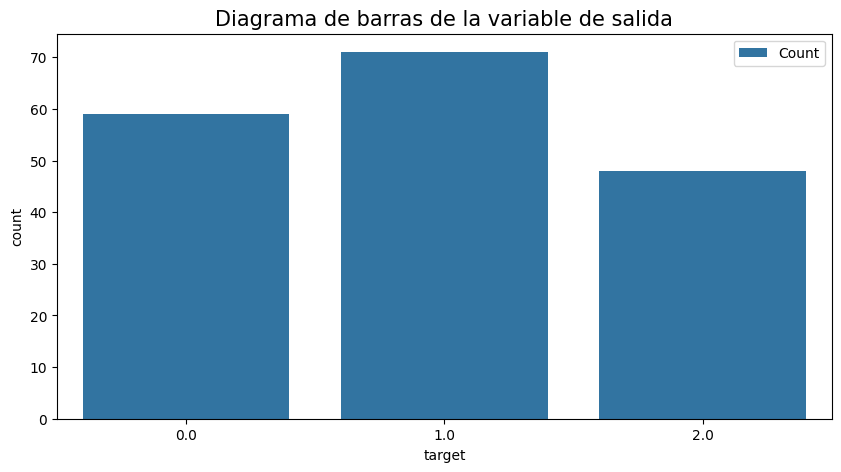

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'target' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

 esta levemente desbalanceado 

In [5]:
valores_faltantes = df.isna().any()
valores_faltantes

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

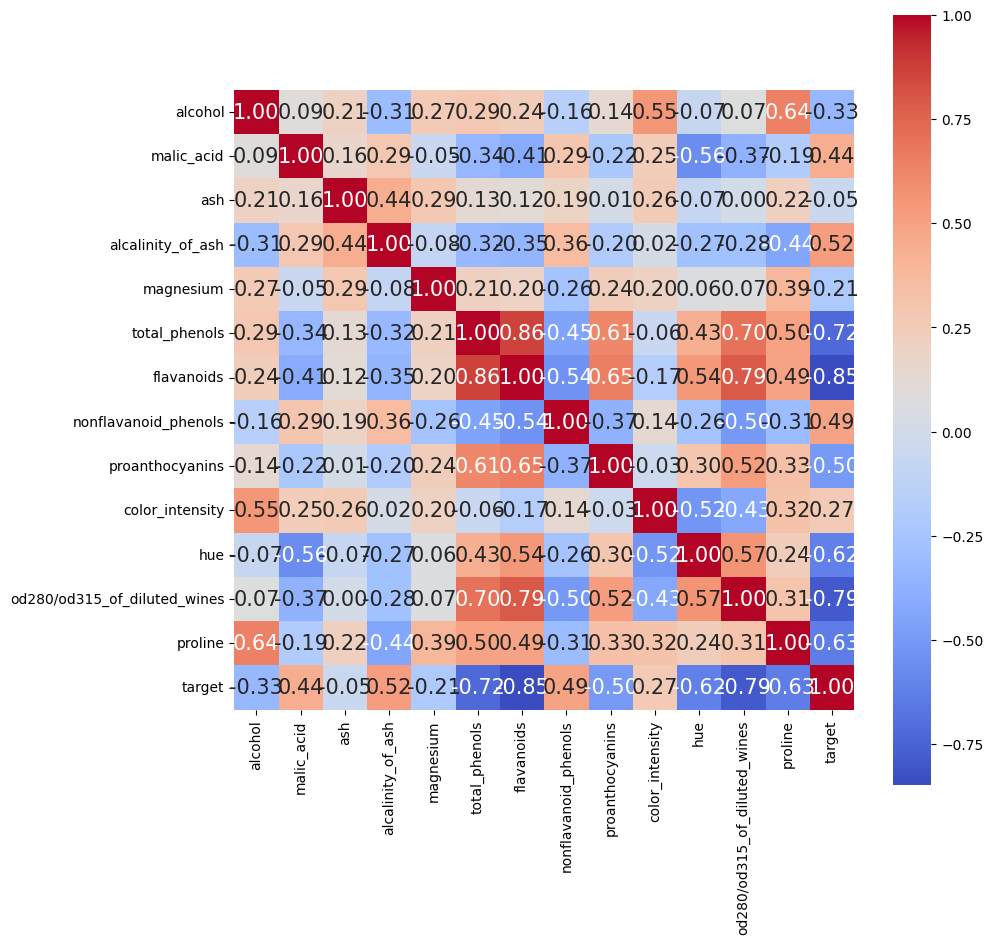

In [6]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, 
           yticklabels= df.columns,
           cmap= 'coolwarm')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_cols)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)

rfe.fit(X, Y)

selected_features = rfe.support_
feature_ranking = rfe.ranking_
feature_ranking

array([1, 5, 8, 6, 4, 3, 1, 9, 7, 1, 2, 1, 1])

In [8]:
X_cols.loc[:,selected_features]

,alcohol,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
0,14.23,3.06,5.64,3.92,1065.0
1,13.20,2.76,4.38,3.40,1050.0
2,13.16,3.24,5.68,3.17,1185.0
3,14.37,3.49,7.80,3.45,1480.0
4,13.24,2.69,4.32,2.93,735.0
...,...,...,...,...,...
173,13.71,0.61,7.70,1.74,740.0
174,13.40,0.75,7.30,1.56,750.0
175,13.27,0.69,10.20,1.56,835.0
176,13.17,0.68,9.30,1.62,840.0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=25, stratify=Y)


In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100)
from sklearn.metrics import accuracy_score
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_test_pred = rf_classifier.predict(X_test)
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Test: 0.9629629629629629


In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
rfc_scores = RandomForestClassifier(n_estimators=100)
rfc_scores = cross_val_score(rfc_scores, X, Y, cv=5)
print(rfc_scores)

[0.94444444 0.94444444 1.         0.97142857 1.        ]


In [14]:
print("Accuracy para rf: %0.2f (+/- %0.2f)" % (rfc_scores.mean(), rfc_scores.std() * 2))

Accuracy para rf: 0.97 (+/- 0.05)


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



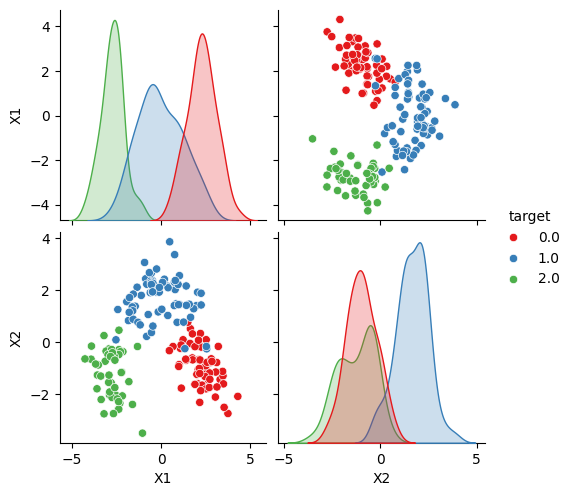

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_scaled = scaler.fit_transform(X_cols)

var_principales = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(np.c_[var_principales, Y], columns= np.append(['X1', 'X2'], ['target']))

sns.pairplot(df_pca, hue = 'target', palette='Set1')
plt.show()

mientras que PCA busca encontrar las direcciones de máxima varianza en los datos, independientemente de las etiquetas de clase, LDA busca encontrar las direcciones que maximicen la separabilidad entre las clases, utilizando la información de las etiquetas de clase. La elección entre PCA y LDA depende de la naturaleza del problema y de si las etiquetas de clase están disponibles.

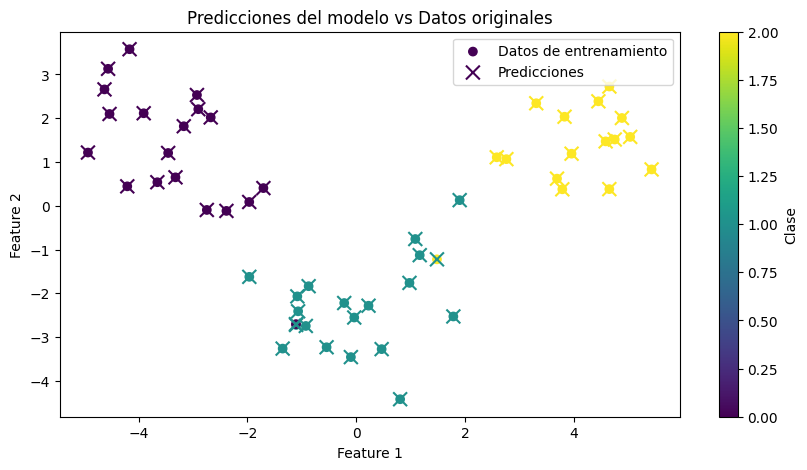

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.fit_transform(X_test, y_test)

plt.figure(figsize=(10, 5))

plt.scatter(X_lda_test[:, 0], X_lda_test[:, 1],cmap='viridis' , c=y_test_pred, marker='o', label='Datos de entrenamiento')

plt.scatter(X_lda_test[:, 0], X_lda_test[:, 1],cmap='viridis' , c=y_test, marker='x', s=100, label='Predicciones')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicciones del modelo vs Datos originales')
plt.legend()
plt.colorbar(label='Clase')
plt.show()